## Hard / Soft Margin Classification

In [94]:
# pip install numpy
# pip install pandas
!pip install matplotlib


In [95]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2 )

In [96]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state = 42))

In [97]:
svm_clf.fit(X,y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [98]:
X_new = [[5.5, 1.7],[5.0, 1.5],[6.0 , 2.0]]
svm_clf.predict(X_new)

array([ True, False,  True])

In [99]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761,  1.76835984])

### Nonlinear SVM Classification

In [100]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X,y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [101]:
X_new = [[5.5, 1.7],[5.0, 1.5],[6.0 , 2.0]]
polynomial_svm_clf.predict(X_new)

array([1, 1, 1])

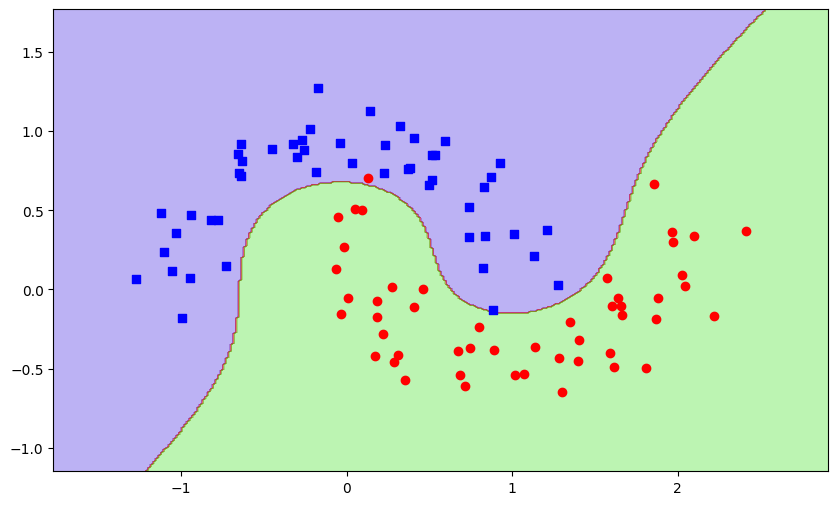

In [102]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,6))
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

clf = make_pipeline(PolynomialFeatures(3), StandardScaler(),
                    LinearSVC(C=10, max_iter=10000, random_state=42))
clf.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 300))
y_pred = clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)
plt.scatter(X[y==0,0], X[y==0,1], marker='s', c='blue')
plt.scatter(X[y==1,0], X[y==1,1], marker='o', c='red')
plt.legend
plt.show()


### Polynomial Kernal

In [103]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X,y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


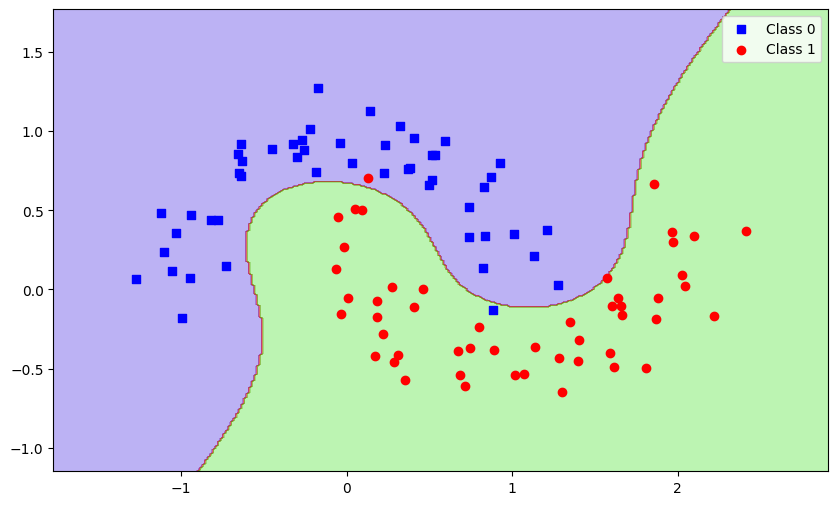

In [104]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

plt.figure(figsize=(10,6))
y_pred = poly_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

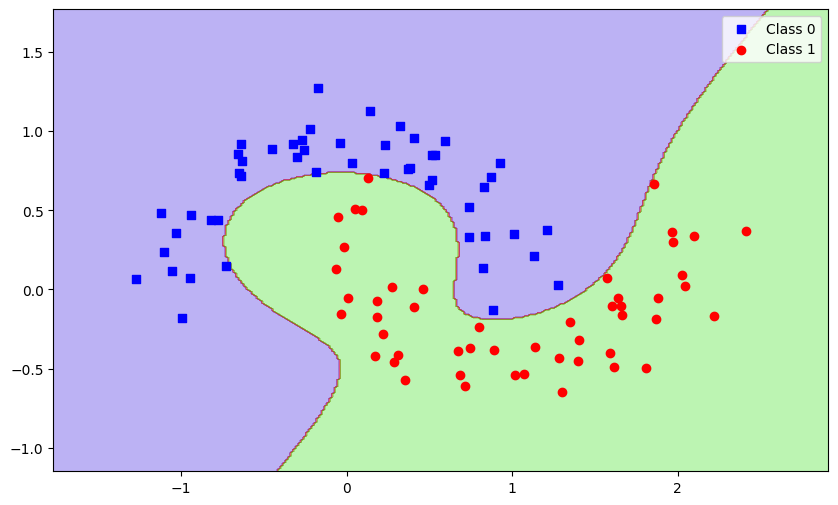

In [105]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=10, coef0=100, C=5))
poly_kernel_svm_clf.fit(X,y)

x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

plt.figure(figsize=(10,6))
y_pred = poly_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

### Gaussiaan RBF Kernel

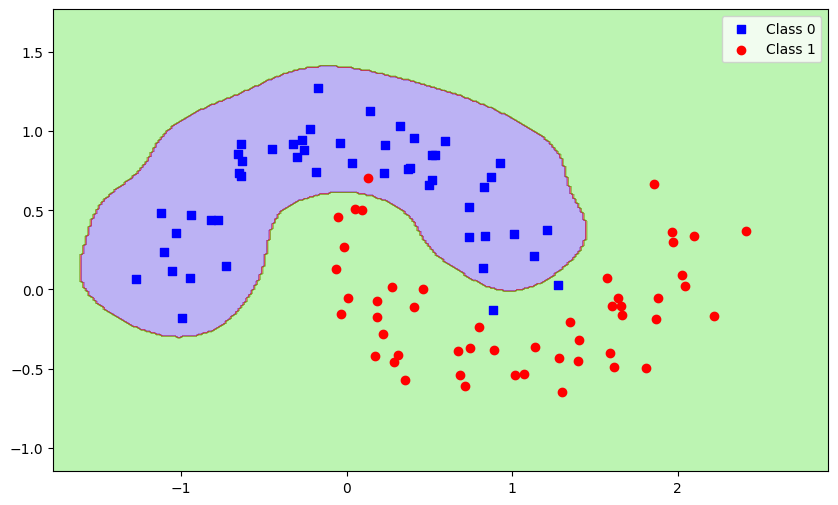

In [106]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)


x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
plt.figure(figsize=(10,6))
y_pred = rbf_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

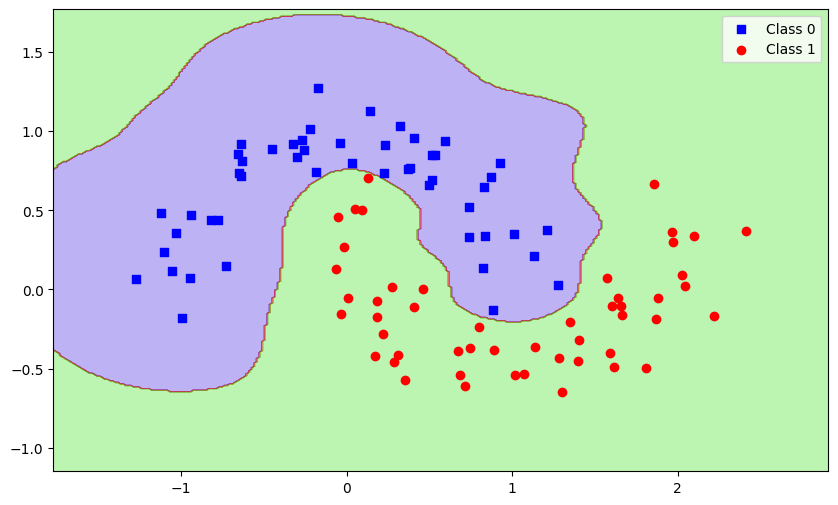

In [107]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=1000))
rbf_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(10,6))
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
y_pred = rbf_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

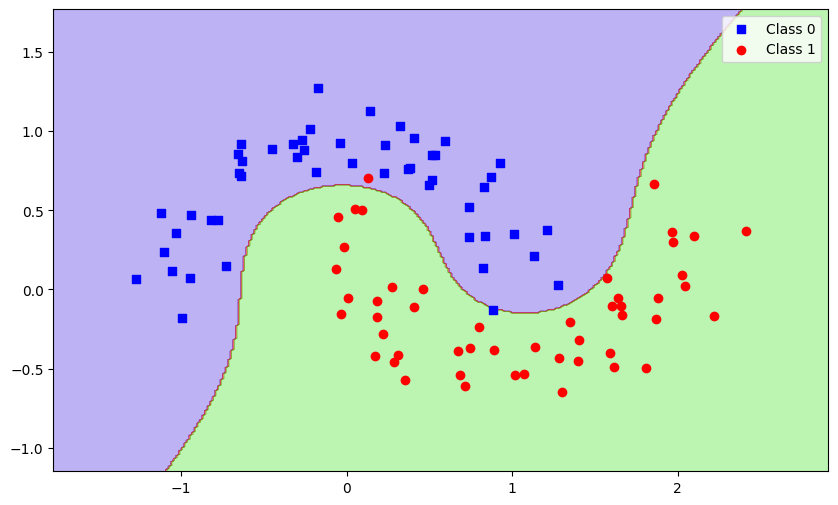

In [108]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=0.1, C=1000))
rbf_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(10,6))
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
y_pred = rbf_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

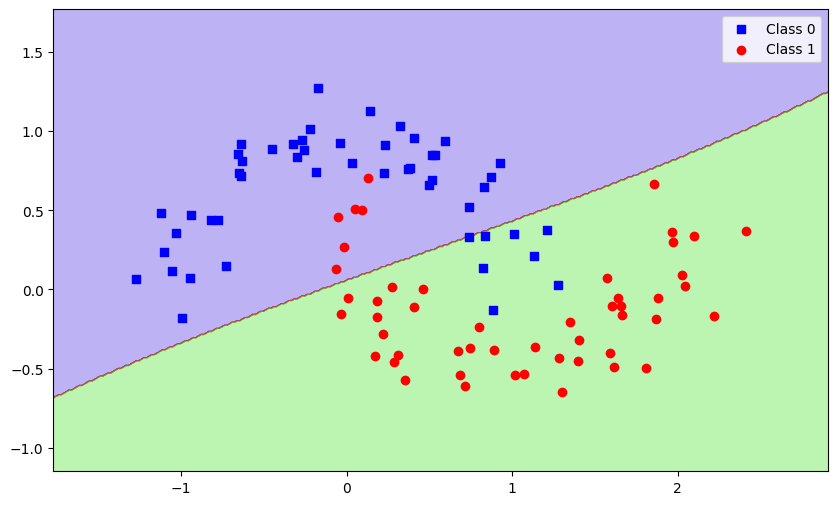

In [109]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=0.1, C=0.1))
rbf_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(10,6))
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
y_pred = rbf_kernel_svm_clf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

# Plot decision regions
plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)

# Plot points (squares & dots)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='s', label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='o', label="Class 1")

plt.legend()
plt.show()

### SVM Regression

In [110]:
from sklearn.svm import LinearSVR
from sklearn.datasets  import load_diabetes
diabetes = load_diabetes()
X,y = diabetes.data[:, [2]], diabetes.target
svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=42))

In [111]:
svm_reg.fit(X,y)

,steps,"[('standardscaler', ...), ('linearsvr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,epsilon,0.5
,tol,0.0001
,C,1.0
,loss,'epsilon_insensitive'


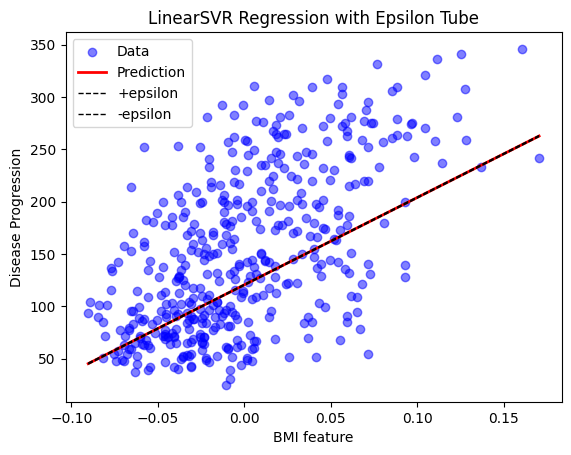

In [112]:
X_new = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = svm_reg.predict(X_new)

# Margins (epsilon-tube)
y_pred_plus = y_pred + 0.5
y_pred_minus = y_pred - 0.5

# Plot
plt.scatter(X, y, c="blue", alpha=0.5, label="Data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction")
plt.plot(X_new, y_pred_plus, "k--", linewidth=1, label="+epsilon")
plt.plot(X_new, y_pred_minus, "k--", linewidth=1, label="-epsilon")

plt.xlabel("BMI feature")
plt.ylabel("Disease Progression")
plt.legend()
plt.title("LinearSVR Regression with Epsilon Tube")
plt.show()

E:\OneDrive\Desktop\Hand's On ML\ML_Projects\Support_Vector_Machines\learnenv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


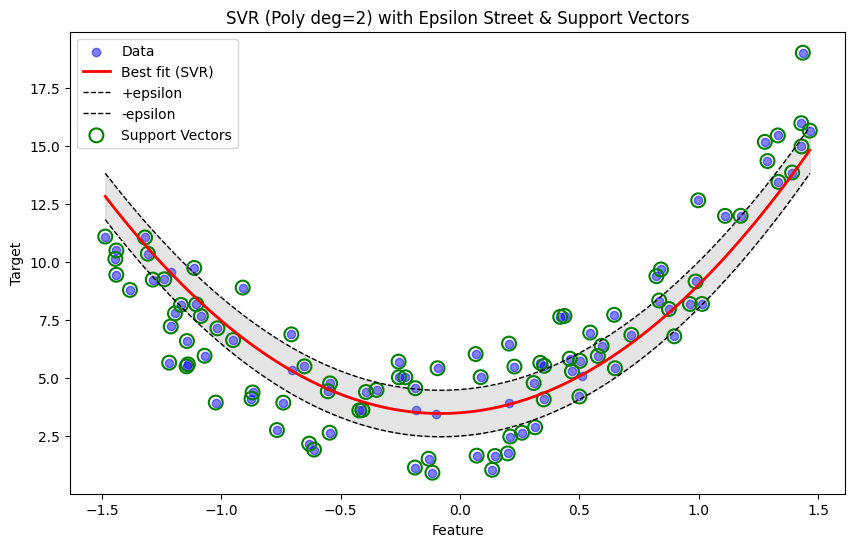

In [129]:
from sklearn.svm import SVR

np.random.seed(0)
X = 3 * np.random.rand(100, 1) - 1.5  # Values between -1.5 and 1.5
y = 5 * X**2 + 2 * X + 3 + np.random.randn(100, 1) * 1.5 
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
svm_poly_reg.fit(X,y)

X_new = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = svm_poly_reg.predict(X_new)

epsilon = 1.0
y_pred_plus = y_pred + epsilon
y_pred_minus = y_pred - epsilon

support_vectors = svm_poly_reg.named_steps['svr'].support_

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Best fit (SVR)")
plt.plot(X_new, y_pred_plus, "k--", linewidth=1, label="+epsilon")
plt.plot(X_new, y_pred_minus, "k--", linewidth=1, label="-epsilon")
plt.fill_between(X_new.ravel(), y_pred_minus, y_pred_plus, color="gray", alpha=0.2)

# Highlight support vectors with circles
plt.scatter(X[support_vectors], y[support_vectors],
            facecolors='none', edgecolors='green', s=100, linewidths=1.5,
            label="Support Vectors")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR (Poly deg=2) with Epsilon Street & Support Vectors")
plt.legend()
plt.show()



E:\OneDrive\Desktop\Hand's On ML\ML_Projects\Support_Vector_Machines\learnenv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


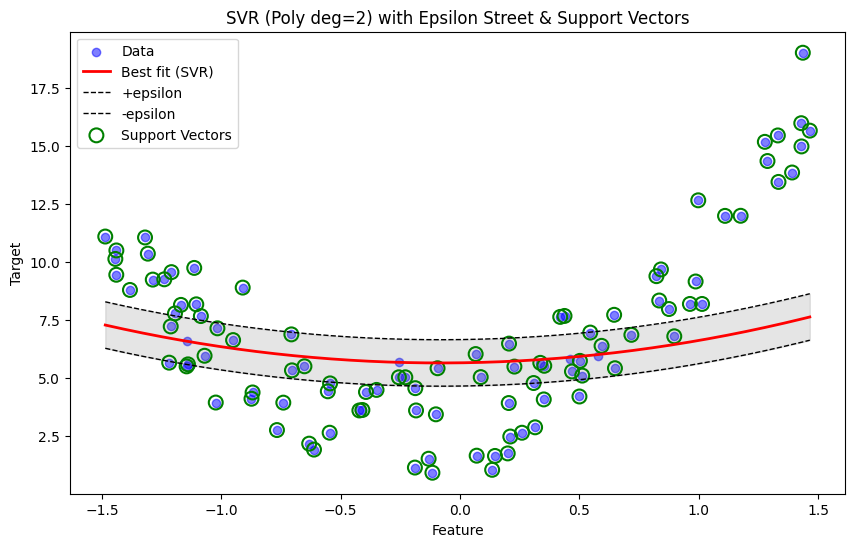

In [131]:
from sklearn.svm import SVR

np.random.seed(0)
X = 3 * np.random.rand(100, 1) - 1.5  # Values between -1.5 and 1.5
y = 5 * X**2 + 2 * X + 3 + np.random.randn(100, 1) * 1.5 
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X,y)

X_new = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = svm_poly_reg.predict(X_new)

epsilon = 1.0
y_pred_plus = y_pred + epsilon
y_pred_minus = y_pred - epsilon

support_vectors = svm_poly_reg.named_steps['svr'].support_

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Best fit (SVR)")
plt.plot(X_new, y_pred_plus, "k--", linewidth=1, label="+epsilon")
plt.plot(X_new, y_pred_minus, "k--", linewidth=1, label="-epsilon")
plt.fill_between(X_new.ravel(), y_pred_minus, y_pred_plus, color="gray", alpha=0.2)

# Highlight support vectors with circles
plt.scatter(X[support_vectors], y[support_vectors],
            facecolors='none', edgecolors='green', s=100, linewidths=1.5,
            label="Support Vectors")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR (Poly deg=2) with Epsilon Street & Support Vectors")
plt.legend()
plt.show()
